In [57]:
import pandas as pd
import seaborn as sns

In [58]:
pd.set_option("max_columns", 80)

In [59]:
df = pd.read_csv('data/interim_data/cdc_data_cleaned.csv')

In [60]:
df.head()

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year_data_collected,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,RESIDENTS,Not Available,February,37,"Hospital, clinic or Medical Center",Married,Tuesday,2015,Natural,No,Not Available,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O995,31O268,2,O268,O903,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
1,RESIDENTS,Not Available,January,56,"Hospital, clinic or Medical Center",Widowed,Tuesday,2015,Natural,No,Not Available,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O268,21O971,31O971,2,O268,O971,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
2,RESIDENTS,Not Available,March,31,Other,Married,Tuesday,2015,Natural,No,Not Available,Obstetric embolism,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O993,21O881,Not Available,1,O881,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
3,INTRASTATE NONRESIDENTS,Not Available,April,24,"Hospital, clinic or Medical Center",Divorced,Thursday,2015,Not Available,Unknown,Not Available,Other and unspecified pregnancy with abortive ...,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",2,11O080,21O069,Not Available,1,O065,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
4,INSTRASTATE NONRESIDENTS,Not Available,July,28,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2015,Natural,No,Not Available,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O994,21O998,Not Available,2,O998,O994,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black


In [61]:
df['race'].unique()

array(['Black', 'White', 'American Indian (includes Aleuts and Eskimos)',
       'Chinese', 'Filipino', 'Asian Indian',
       'Other Asian or Pacific Islander in areas reporting codes 18-58',
       'Combined other Asian or Pacific Islander, includes codes 18-68',
       'Japanese', 'Vietnamese', 'Korean',
       'Hawaiian (includes Part-Hawaiian)', 'Guamanian'], dtype=object)

In [62]:
df['race_recode_3'].unique()

array(['Black', 'White', 'Races other than White or Black'], dtype=object)

In [63]:
df['race_recode_5'].unique()

array(['Black', 'White', 'American Indian', 'Asian or Pacific Islander'],
      dtype=object)

In [64]:
df['hispanic_origin'].unique()

array(['Non – Hispanic', 'Mexican', 'South American', 'Central American',
       'Puerto Rican', 'Unknown', 'Central and South American',
       'Other Hispanic', 'Latin American', 'Cuban', 'Dominican'],
      dtype=object)

In [65]:
df.shape

(3417, 28)

In [66]:
df[df['hispanic_origin'] == 'Non – Hispanic'].count()

resident_status                                        2903
level_of_education                                     2903
month_of_death                                         2903
age                                                    2903
place_of_death_patient_status                          2903
marital_status                                         2903
day_of_week_of_death                                   2903
year_data_collected                                    2903
manner_of_death                                        2903
was_autopsy_done                                       2903
place_of_injury_for_icd_w00_y34_except_y06_and_y07_    2903
358_causes_of_death                                    2903
113_causes_of_death                                    2903
130_causes_of_infant_death                             2903
39_cause_recode                                        2903
number_of_entity_axis_conditions                       2903
entity_condition_1                      

In [67]:
df['manner_of_death'].unique()

array(['Natural', 'Not Available', 'Could not determine',
       'Pending investigation', 'Accident', 'Homicide', 'Suicide'],
      dtype=object)

In [68]:
df['race_recode_3'].describe()

count      3417
unique        3
top       White
freq       2113
Name: race_recode_3, dtype: object

In [69]:
df.shape

(3417, 28)

In [70]:
column_name = 'race_recode_3'

df_grouped_by_race = df.groupby(df[column_name]).size()
df_grouped_by_race

race_recode_3
Black                              1108
Races other than White or Black     196
White                              2113
dtype: int64

3417 rows in dataset => 3417 deaths
1108 black women deaths
2113 white women deaths
196 other races deaths

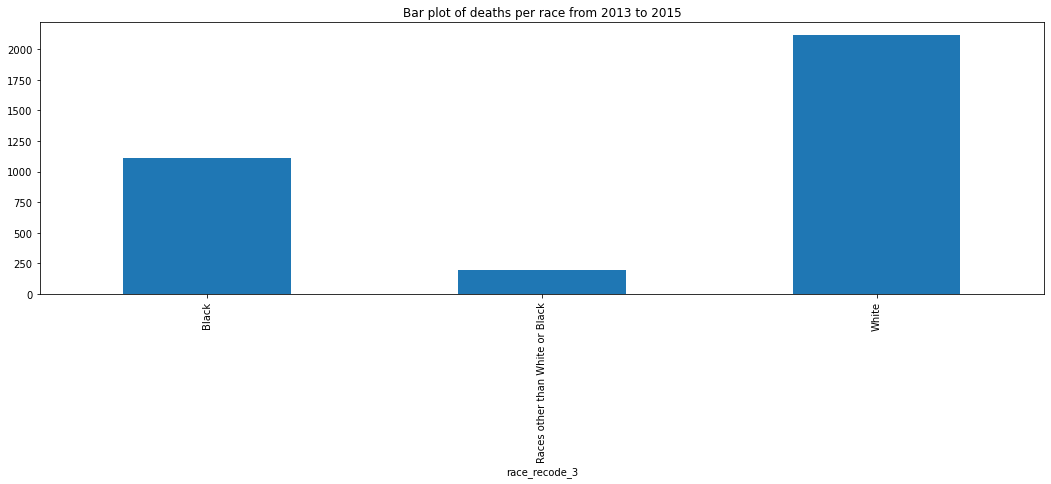

In [71]:
df_grouped_by_race.plot.bar(
    title=f'Bar plot of deaths per race from 2013 to 2015',
    figsize=(18,5)
)

# We Need to find total population of black/white women to see what's the maternal mortality percentage.
# If possible, do same analysis including hispanic, and same anaylisys excluding hispanic

In [72]:
# Grace to find total population of USA separated by race.
# If possible by white/black/other and by hispanic and non hispanic.
# Choose one of the options:
# 1 - Load data to a dataframe
# 2 - Create variables with the total number per race and add link with reference
# 3 - Loading from census library)

In [73]:
# Valentina and Nancy to investigate Missiningess of Data
# Ideas of how this can be done is explained in the Exploratory Data Analysis Guide

In [74]:
# 1108 black women deaths
# 2113 white women deaths
# 196 other races deaths

column1 = 'race_recode_3'
column2 = 'place_of_death_patient_status'

df_grouped_by_race_and_death_place = df.groupby([column1, column2]).size()
df_grouped_by_race_and_death_place
# place_of_death_patient_status

race_recode_3                    place_of_death_patient_status     
Black                            Descendent's home                       25
                                 Hospital, clinc or Medical Center       15
                                 Hospital, clinic or Medical Center    1020
                                 Nursing home/long term care             18
                                 Other                                   29
                                 Place of death unknown                   1
Races other than White or Black  Hospital, clinc or Medical Center        2
                                 Hospital, clinic or Medical Center     189
                                 Nursing home/long term care              1
                                 Other                                    4
White                            Descendent's home                       68
                                 Hospital, clinc or Medical Center       20
                    

In [75]:
def create_race_heatmap(df, column):
    event_count_table = pd.crosstab(
        index=df['race_recode_3'],
        columns=df[column],
        normalize='index'
    )
    
    return sns.heatmap(event_count_table, cmap='Reds', linewidths=1.5)

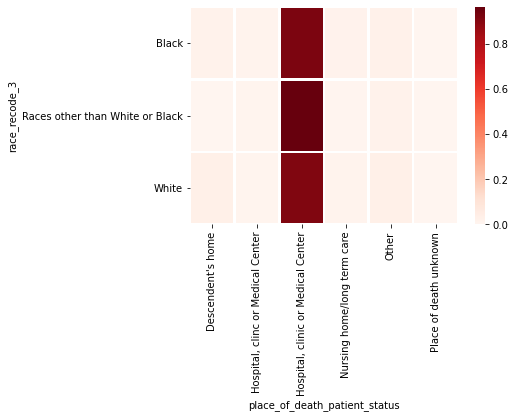

In [76]:
# with hispanics
# df_race_and_death_place = df[['race_recode_3', 'place_of_death_patient_status']]

create_race_heatmap(df, 'place_of_death_patient_status')

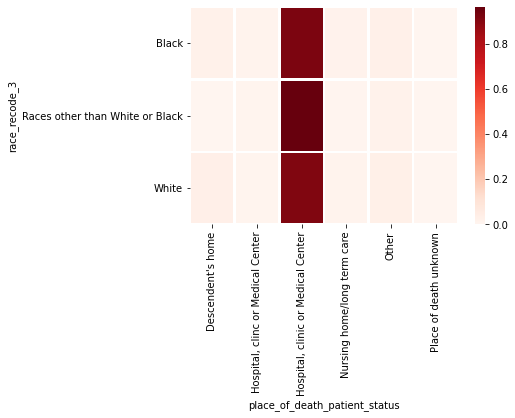

In [77]:
# 'Non – Hispanic'
df_non_hispanic = df[df["hispanic_origin"] == "Non – Hispanic"]

# df_race_and_death_place_non_hispanic = df_race_and_death_place_non_hispanic[['race_recode_3', 'place_of_death_patient_status']]

create_race_heatmap(df_non_hispanic, 'place_of_death_patient_status')

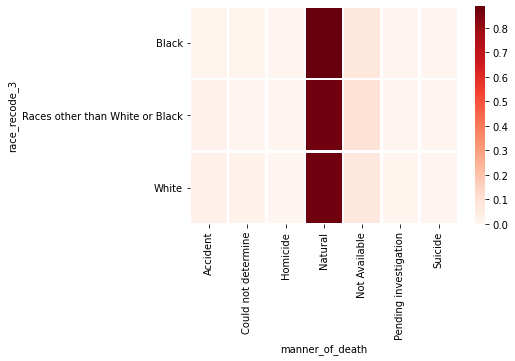

In [78]:
# hispanic
create_race_heatmap(df, 'manner_of_death')

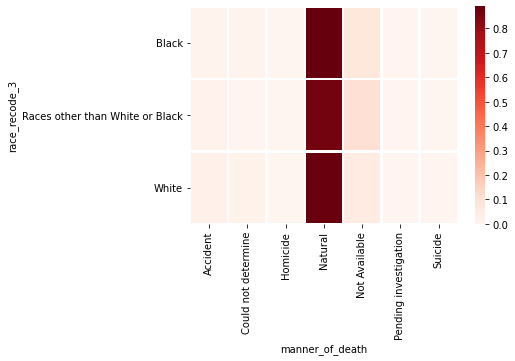

In [79]:
# non-hispanic
create_race_heatmap(df_non_hispanic, 'manner_of_death')

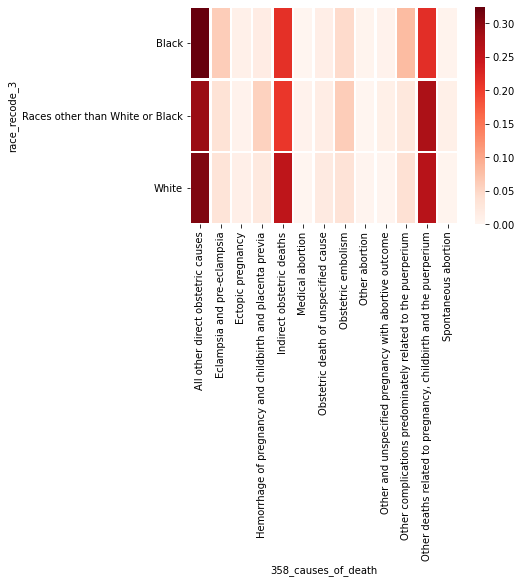

In [80]:
# with hispanics
create_race_heatmap(df, '358_causes_of_death')

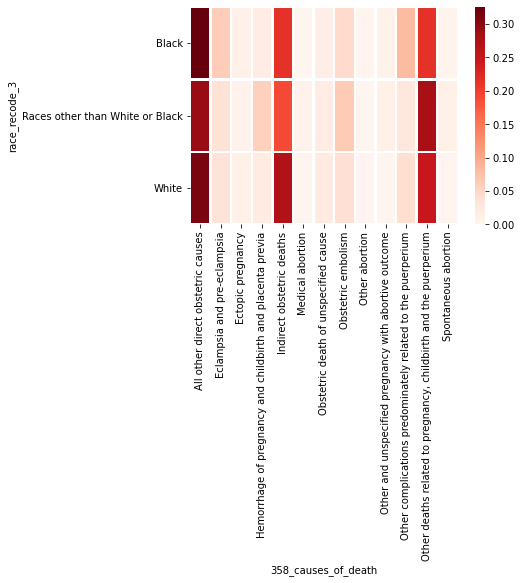

In [81]:
# without hispanics
create_race_heatmap(df_non_hispanic, '358_causes_of_death')

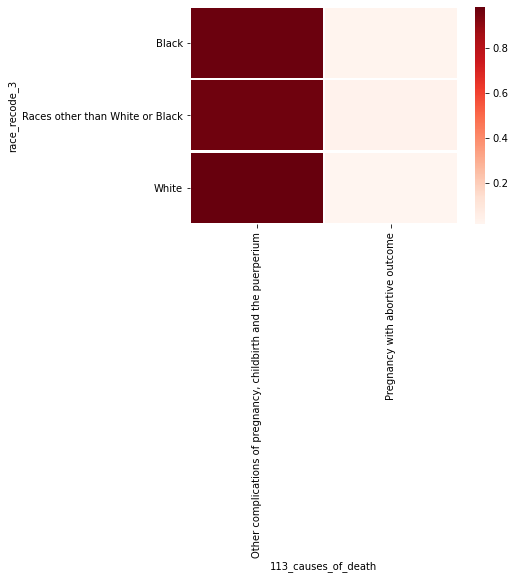

In [82]:
# without hispanics
create_race_heatmap(df_non_hispanic, '113_causes_of_death')

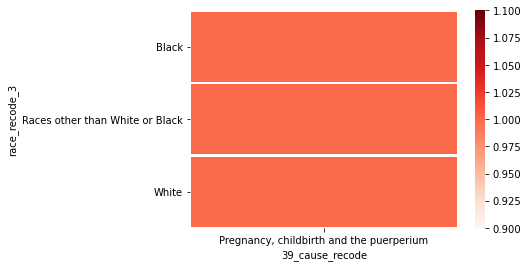

In [83]:
# without hispanics
create_race_heatmap(df_non_hispanic, '39_cause_recode')

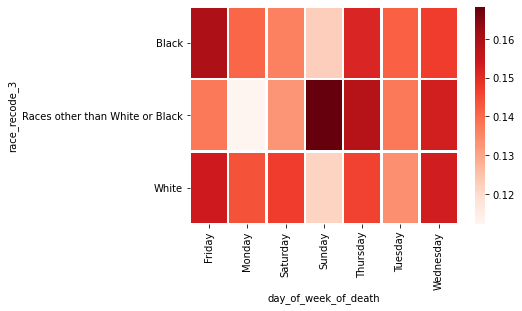

In [84]:
# with hispanics
create_race_heatmap(df, 'day_of_week_of_death')

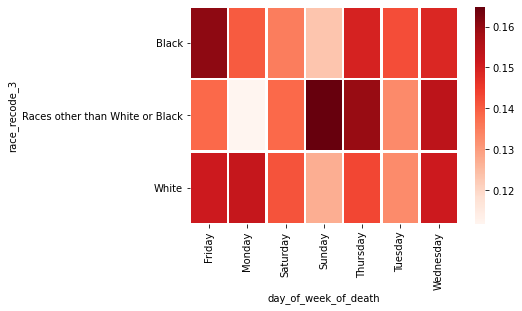

In [85]:
# non-hispanics
create_race_heatmap(df_non_hispanic, 'day_of_week_of_death')

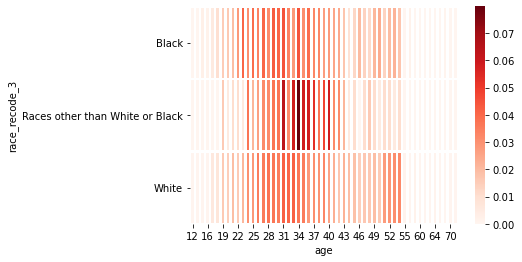

In [86]:
# with hispanics
create_race_heatmap(df_non_hispanic, 'age')

In [87]:
df['level_of_education'].describe()

count     3417
unique      10
top        3.0
freq      1242
Name: level_of_education, dtype: object

In [88]:
df['level_of_education'].unique()

array(['Not Available', '4.0', 'no education item on certificate', '3.0',
       '5.0', '2003 revision of education item on certificate', '9.0',
       '6.0', '7.0', '8.0'], dtype=object)